$$
Importing\;neccessary\;libraries
$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

$$
Creating\;a\;network\;with\;weights\;between\;low\;and\;high
$$

In [0]:
def network(input_size,hidden_size,output_size,low,high):
  whx=np.random.uniform(low, high, size=(hidden_size,input_size))
  woh=np.random.uniform(low, high, size=(output_size,hidden_size))
  
  bh=np.random.uniform(low, high, size=(hidden_size,))
  bo=np.random.uniform(low, high, size=(output_size,))
  
  return (np.matrix(whx),np.matrix(woh),np.matrix(bh),np.matrix(bo))

$$
Sigmoid\;function
$$

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

$$
Forward\;propagation
$$

In [0]:
def forward_propagation(x,Whx,Woh,Bh,Bo):
  h=np.dot(Whx,np.transpose(x))
  h=sigmoid(np.add(h,np.transpose(Bh)))
  
  o=np.dot(Woh,h)
  o=sigmoid(np.add(o,np.transpose(Bo)))
  
  return(h,o)

$$
Derivative\;of\;sigmoid\;function
$$

In [0]:
def transfer_derivative(num):
  return num-np.multiply(num,num)

$$
Sparse\;autoencoder(784,500,784)\;from\;scratch
$$

$$
KL\;divergence
$$

In [0]:
def kl_divergence(p,h):
  return np.sum(p*np.log(p/h)+(1-p)*np.log((1-p)/(1-h)))

In [0]:
def back_propagation_autoencoder(target,output,h,x,Woh):
  do=np.multiply(-(target-output),transfer_derivative(output))
  dWoh=np.matmul(np.matrix(do),np.matrix(np.transpose(h)))
  dBo=do
  
  dh=np.matmul(np.multiply(np.transpose(Woh),transfer_derivative(h))
               ,np.matrix(do))
  dWhx=np.matmul(np.matrix(dh),np.matrix(x))
  dBh=dh
  
  dsh=np.matmul(transfer_derivative(h),np.matrix(x))
  
  return(np.matrix(dWoh),np.matrix(dWhx),np.matrix(dBo)
         ,np.matrix(dBh),np.matrix(dsh))

In [0]:
def train_autoencoder(x,target,whx,woh,bh,bo,epochs,lr,sp,lamda):
  for i in range(epochs):
    loss=0
    sdWoh,sdWhx=np.zeros(np.shape(woh)),np.zeros(np.shape(whx))
    sdBo,sdBh=np.zeros(np.shape(bo)),np.zeros(np.shape(bh))
    sdsh=np.zeros(np.shape(whx))
    sh=np.zeros((np.shape(whx)[0],1))
    for j in range(np.shape(x)[0]):
      (h,o)=forward_propagation(np.array(x[j]),whx,woh,bh,bo)
      (dWoh,dWhx,dBo,dBh,dsh)=back_propagation_autoencoder(np.array(target[j])
                                                           ,o,h,np.array(x[j])
                                                           ,woh)
      
      sdWoh+=dWoh.reshape(np.shape(woh))
      sdWhx+=dWhx.reshape(np.shape(whx))
      sdBo+=dBo.reshape(np.shape(bo))
      sdBh+=dBh.reshape(np.shape(bh))
      sh+=h.reshape(np.shape(h))
      sdsh+=np.multiply(sdsh/(j+1)
                        ,(-sp/(sh/(j+1))
                          +(1-sp)/(1-sh/(j+1)))).reshape(np.shape(whx))
      
      loss+=0.5*np.sum((target[j][0]-o[0])**2)+lamda*kl_divergence(sp,sh/(j+1))
    
    eff_sdWhx=(sdWhx+lamda*sdsh).reshape(np.shape(whx))
    whx=whx-lr*(1/np.shape(x)[0])*eff_sdWhx
    woh=woh-lr*(1/np.shape(x)[0])*sdWoh.reshape(np.shape(woh))
    bh=bh-lr*(1/np.shape(x)[0])*sdBh.reshape(np.shape(bh))
    bo=bo-lr*(1/np.shape(x)[0])*sdBo.reshape(np.shape(bo))
    
    if i%(epochs/10)==0:
      print("Epoch:",end=" ")
      print(i+1)
      print("loss:",end=" ")
      print(loss/np.shape(x)[0])
    
  return(whx,woh,bh,bo)

$$
Data\;preprocessing\;of\;MNIST\;data
$$

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train = np.vstack([img.reshape((28, 28)) for img in mnist.train.images])
y_train = mnist.train.labels
X_test = np.vstack([img.reshape(28, 28) for img in mnist.test.images])
y_test = mnist.test.labels
del mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


$$
Data\;preprocessing(Using\;100\;MNIST\;images\;for\;training:):
$$

In [0]:
x_train=list()
y_train=list()
for i in range(0,28*100,X_train.shape[1]):
  r=list()
  for j in range(X_train.shape[1]):
    r=r+list(X_train[i+j])
  x_train.append(np.matrix(r))
  y_train.append(np.transpose(np.matrix(r)))

x_train=np.array(x_train)

$$
Training\;sparse\;autoencoder(784,500,784)\;on\;MNIST\;data
$$

In [14]:
(Whxa1,Woha1,Bha1,Boa1)=network(784,500,784,low=0.001,high=0.01)
(Whxa1,Woha1,Bha1,Boa1)=train_autoencoder(x_train,y_train
                                          ,np.array(Whxa1)
                                          ,np.array(Woha1)
                                          ,np.array(Bha1)
                                          ,np.array(Boa1)
                                          ,epochs=250
                                          ,lr=0.5
                                          ,sp=0.0001
                                          ,lamda=0.0000001)

Epoch: 1
loss: 0.3617410809178024
Epoch: 26
loss: 0.0003133739670516436
Epoch: 51
loss: 0.00011092294886828296
Epoch: 76
loss: 6.110957555809284e-05
Epoch: 101
loss: 4.5058701567883345e-05
Epoch: 126
loss: 3.9832451818892935e-05
Epoch: 151
loss: 4.073325797103907e-05
Epoch: 176
loss: 3.801958566498322e-05
Epoch: 201
loss: 3.530223628898157e-05
Epoch: 226
loss: 3.429264282371627e-05


$$
Reconstructing\;the\;image\;using\;sparse\;autoencoder
$$

Orginal image:


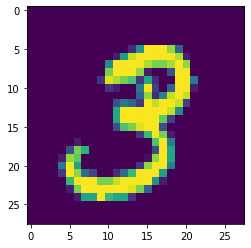

Reconstructed_image from sparse autoencoder:


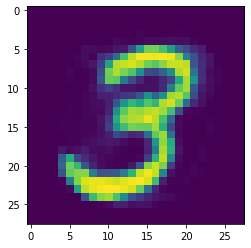

In [15]:
print('Orginal image:')
plt.imshow(x_train[1].reshape(28,28))
plt.show()
(ha1,oa1)=forward_propagation(np.array(x_train[1]),Whxa1,Woha1,Bha1,Boa1)
print("Reconstructed_image from sparse autoencoder:")
plt.imshow(oa1.reshape(28,28))